# POTENCIALES EVOCADOS

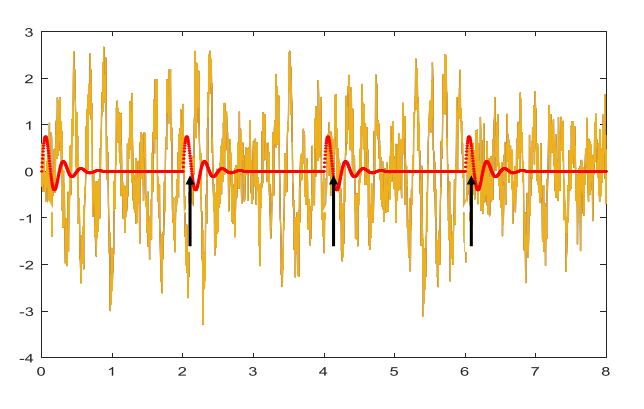

Partimos de que los Potenciales Evocados cuentan con:
* Latencia característica
* Baja SNR (relación señal-ruido)
* Baja variabilidad intersujeto

---

Importo librerías que voy a utilizar:

In [ ]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import scipy.io
import math as m

## Creación de tira de EEG con PEs de manera artificial

1. Potencial evocado artificial = Seno amortiguado por una exponencial negativa

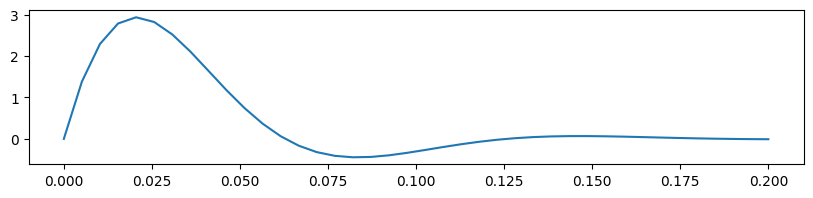

In [ ]:
fs = 200

t_pe = np.linspace(0,0.2,int(0.2*fs))

pe = np.sin(50*t_pe)*np.exp(-30*t_pe)
pe = pe/np.std(pe)

plt.figure(figsize=(10,2))
plt.plot(t_pe, pe)
plt.show()

2. Agregamos la latencia:

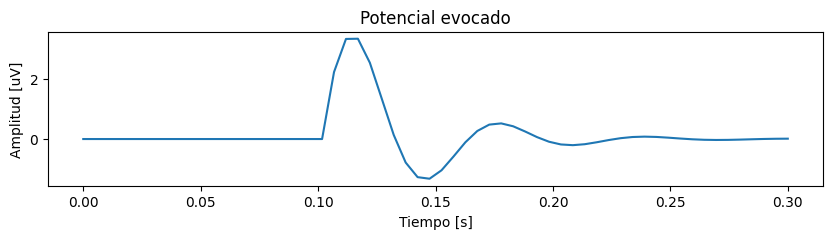

In [ ]:
fs = 200
latencia = 100 #milisegundos
lat = latencia*(10**-3)*fs

t_pe = np.linspace(0,0.2,int(fs*0.2))
pe = np.sin(100*t_pe)*np.exp(-30*t_pe)
pe = pe/np.std(pe) #normalizo

l = np.zeros([1,int(lat)]) #latencia
s = np.append(l,pe) #señal = latencia + onda
t = np.linspace(0,s.shape[0]/fs,int(s.shape[0])) #tiempo de señal

plt.figure(figsize=(10,2))
plt.plot(t,s)
plt.title('Potencial evocado')
plt.ylabel('Amplitud [uV]')
plt.xlabel('Tiempo [s]')
plt.show()

3. Una realización:

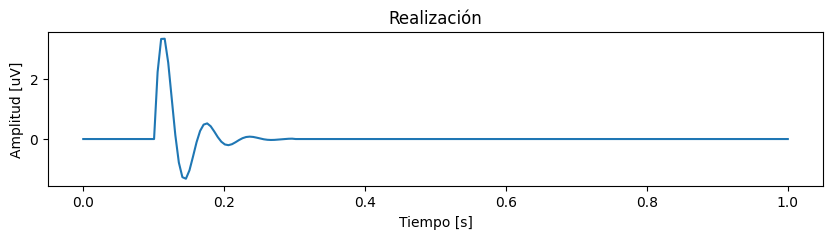

In [ ]:
fs = 200
latencia = 100
lat = latencia*(10**-3)*fs

t_pe = np.linspace(0,0.2,int(fs*0.2))
pe = np.sin(100*t_pe)*np.exp(-30*t_pe)
pe = pe/np.std(pe) #normalizo

l = np.zeros([1,int(lat)])
s = np.append(l,pe)
t = np.linspace(0,s.shape[0]/fs,int(s.shape[0]))

end = np.zeros([1,fs-s.shape[0]]) #1 segundo info total
sig = np.append(s,end) # señal = latencia + onda + medio segundo
t_sig = np.linspace(0,sig.shape[0]/fs,sig.shape[0]) # 1 segundo

plt.figure(figsize=(10,2))
plt.plot(t_sig,sig)
plt.title('Realización')
plt.ylabel('Amplitud [uV]')
plt.xlabel('Tiempo [s]')
plt.show()

4. Tira con 5 potenciales "limpios":

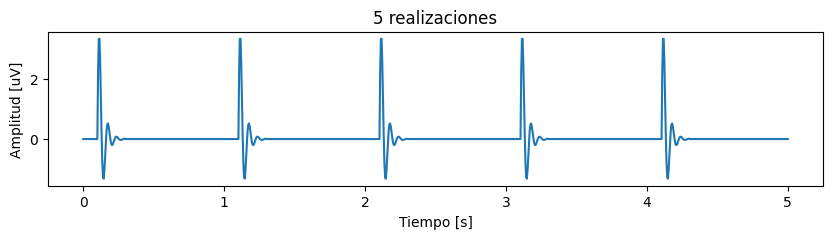

In [ ]:
fs = 200
latencia = 100
lat = latencia*(10**-3)*fs

t_pe = np.linspace(0,0.2,int(fs*0.2))
pe = np.sin(100*t_pe)*np.exp(-30*t_pe)
pe = pe/np.std(pe)

l = np.zeros([1,int(lat)])
s = np.append(l,pe)
t = np.linspace(0,s.shape[0]/fs,int(s.shape[0]))

end = np.zeros([1,fs-s.shape[0]])
sig = np.append(s,end)
t_sig = np.linspace(0,sig.shape[0]/fs,sig.shape[0])

cant_pe = 5 #cantidad de PEs
signal = np.tile(sig, cant_pe) # 5 realizaciones
t_signal = np.linspace(0,signal.shape[0]/fs,signal.shape[0]) #5 segundos

plt.figure(figsize=(10,2))
plt.plot(t_signal,signal)
plt.title('5 realizaciones')
plt.ylabel('Amplitud [uV]')
plt.xlabel('Tiempo [s]')
plt.show()

5. Tira con 5 potenciales en el "mar" de EEG:

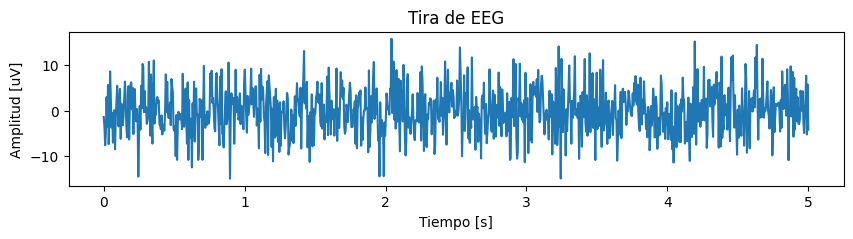

In [ ]:
fs = 200
latencia = 100
lat = latencia*(10**-3)*fs

t_pe = np.linspace(0,0.2,int(fs*0.2))
pe = np.sin(100*t_pe)*np.exp(-30*t_pe)
pe = pe/np.std(pe)

l = np.zeros([1,int(lat)])
s = np.append(l,pe)
t = np.linspace(0,s.shape[0]/fs,int(s.shape[0]))

end = np.zeros([1,fs-s.shape[0]])
sig = np.append(s,end)
t_sig = np.linspace(0,sig.shape[0]/fs,sig.shape[0])

cant_pe = 5
signal = np.tile(sig, cant_pe)
t_signal = np.linspace(0,signal.shape[0]/fs,signal.shape[0])

pot_ruido = 5 #potencia del ruido del mar de EEG
noise = pot_ruido*np.random.randn(int(signal.shape[0])) #mar de EEG
eeg = signal + noise #eeg es el ruido con los PEs
t_eeg = t_signal.copy() # 5 segundos

plt.figure(figsize=(10,2))
plt.plot(t_eeg,eeg)
plt.title('Tira de EEG')
plt.ylabel('Amplitud [uV]')
plt.xlabel('Tiempo [s]')
plt.show()

6. Función para crear la tira de EEG con los potenciales evocados:

In [ ]:
def tira_eeg(fs=200 , latencia=100, cant_pe=5, potencia=5, plotting=True):
  lat = latencia*(10**-3)*fs

  t_pe = np.linspace(0,0.2,int(fs*0.2))
  pe = np.sin(100*t_pe)*np.exp(-30*t_pe)
  pe = pe/np.std(pe)

  l = np.zeros([1,int(lat)])
  s = np.append(l,pe)
  t = np.linspace(0,s.shape[0]/fs,int(s.shape[0]))

  end = np.zeros([1,fs-s.shape[0]])
  sig = np.append(s,end)
  t_sig = np.linspace(0,sig.shape[0]/fs,sig.shape[0])

  signal = np.tile(sig, cant_pe)
  t_signal = np.linspace(0,signal.shape[0]/fs,signal.shape[0])

  noise = potencia*np.random.randn(int(signal.shape[0])) #mar de EEG
  eeg = signal + noise #eeg es el ruido con los PEs
  t_eeg = t_signal.copy() # 5 segundos

  if plotting:
    plt.figure(figsize=(10,2))
    plt.plot(t_eeg,eeg)
    plt.title('Tira de EEG')
    plt.ylabel('Amplitud [uV]')
    plt.xlabel('Tiempo [s]')
    plt.show()

  return t_eeg, eeg

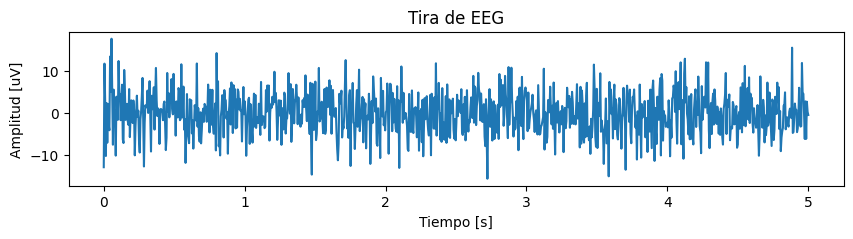

In [ ]:
t_eeg, eeg = tira_eeg() #fs=200 , latencia=100, cant_pe=5, potencia=5, plotting = True

7. Función para crear realizaciones:

In [ ]:
def realizaciones(fs=200 , latencia=100, cant_pe=5, potencia=10, plotting = True):
  lat = latencia*(10**-3)*fs

  t_pe = np.linspace(0,0.2,int(fs*0.2))
  pe = np.sin(100*t_pe)*np.exp(-30*t_pe)
  pe = pe/np.std(pe)

  l = np.zeros([1,int(lat)])
  s = np.append(l,pe)

  end = np.zeros([1,fs-s.shape[0]])
  sig = np.append(s,end)
  potencial_evocado = sig.copy()
  eeg = np.zeros([cant_pe,sig.shape[0]])

  for i in range(0,cant_pe):
    noise = potencia * np.random.randn(sig.shape[0])
    eeg[i,:] = sig+noise

  t_eeg = np.linspace(0,eeg.shape[1]/fs, eeg.shape[1])

  if plotting:
    plt.figure(figsize=(10,5))
    for i in range(cant_pe):
      plt.plot(t_eeg, eeg[i]-i*potencia*3)
    plt.title('Realizaciones')
    plt.ylabel('Amplitud [uV]')
    plt.xlabel('Tiempo [s]')
    plt.show()

  return t_eeg, eeg, potencial_evocado

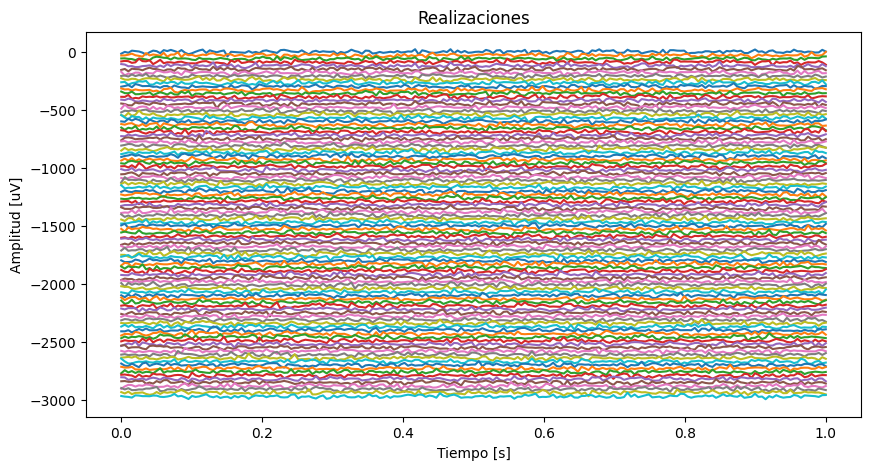

In [ ]:
t_eeg, eeg, pe = realizaciones(cant_pe=100)

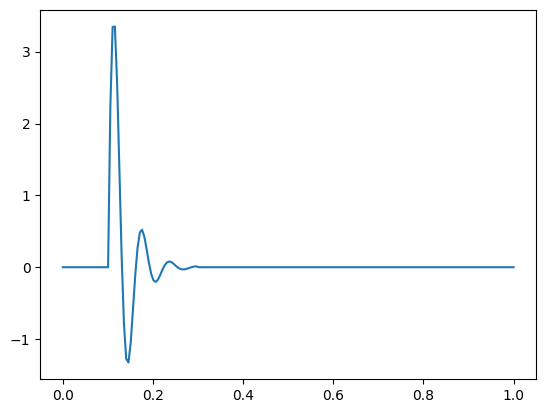

In [ ]:
plt.figure()
plt.plot(t_eeg,pe)

In [ ]:
eeg.shape # cant_realizaciones x fs (ventana recortada)

(100, 200)

## Estimación del ruido

PROMEDIO EN EL ENSAMBLE

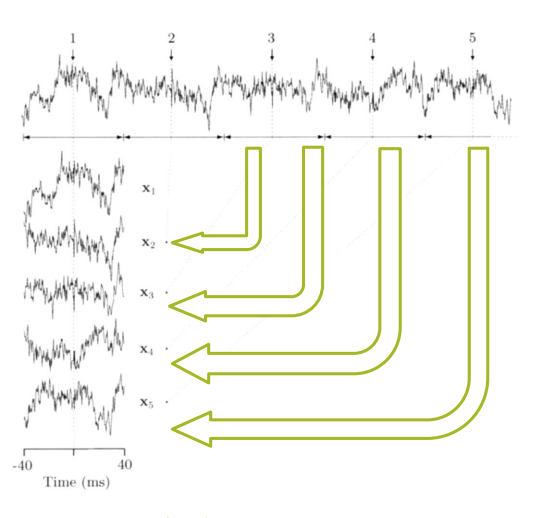

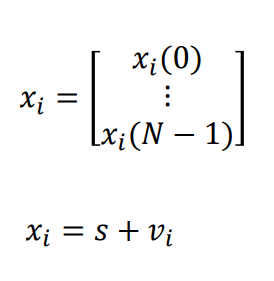

### PROMEDIO HOMOGÉNEO


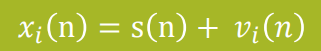

**Supuestos:**


*   Ruido con media cero (aleatorio)
*   Ruido descorrelacionado (aleatorio)
*   Ruido con distribución Gaussiana
*   Potencial con morfología y amplitud fija en cada realización (determinista)
*   Ruido es aditivo; se suma a la señal del PE

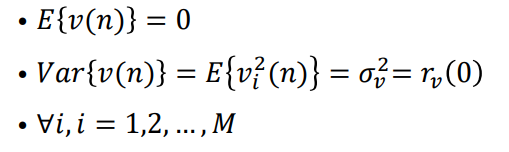

$x_i[n] = s[n] + v_i[n]$

Siendo $s[n]$ el componente determinístico y $v_i[n]$ el componente aleatorio

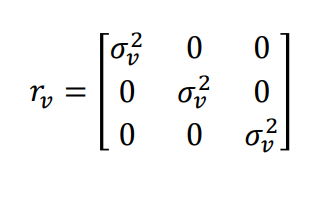

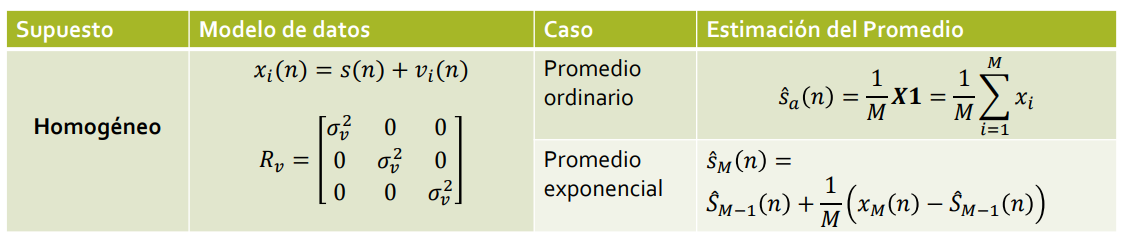

In [ ]:
np.mean([[1,2,3],[2,3,4]], axis=0)

array([1.5, 2.5, 3.5])

#### ORDINARIO

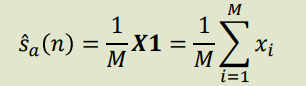



* Promedio ordinario INSESGADO

* Varianza CONSISTENTE



In [ ]:
# Ejemplo np.r_[]]
a = np.array([[1,2,3],[4,5,6]])
b = np.array([7,8,9])
c = np.r_[a,[b]]
print(c)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [ ]:
t_realizaciones, x_realizaciones, pe = realizaciones(cant_pe=350, plotting=False)

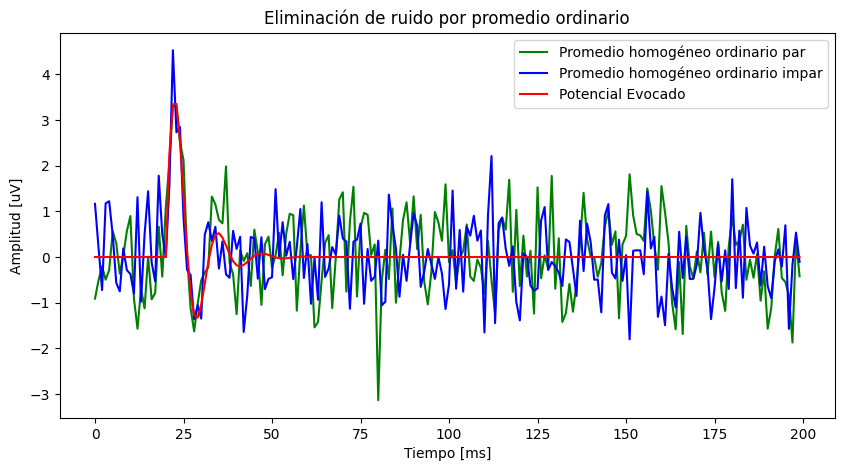

In [ ]:
# 1. Separar a las realizaciones en pares e impares para formar dos subensambles
ensambles_par = x_realizaciones[1::2]
ensambles_impar = x_realizaciones[::2]

# 2. Calcular s0 y s1
s_par = np.mean(ensambles_par, axis = 0)
s_impar = np.mean(ensambles_impar, axis = 0)

# 3. Restarlos
resta = s_par - s_impar

# 4. Calcular la varianza para cada realización
var = np.var(resta)

plt.figure(figsize=(10,5))
plt.plot(s_par, 'g', label = 'Promedio homogéneo ordinario par')
plt.plot(s_impar, 'b', label = 'Promedio homogéneo ordinario impar')
plt.plot(pe, 'r', label = 'Potencial Evocado')
plt.title('Eliminación de ruido por promedio ordinario')
plt.ylabel('Amplitud [uV]')
plt.xlabel('Tiempo [ms]')
plt.legend(loc = 'upper right')
plt.show()

0.9162341293369377

#### Exponencial

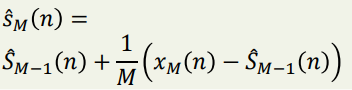



> Promedio exponencial ASINTÓTICAMENTE INSESGADO, CONSISTENTE



In [ ]:
np.zeros((1,2))

array([[0., 0.]])

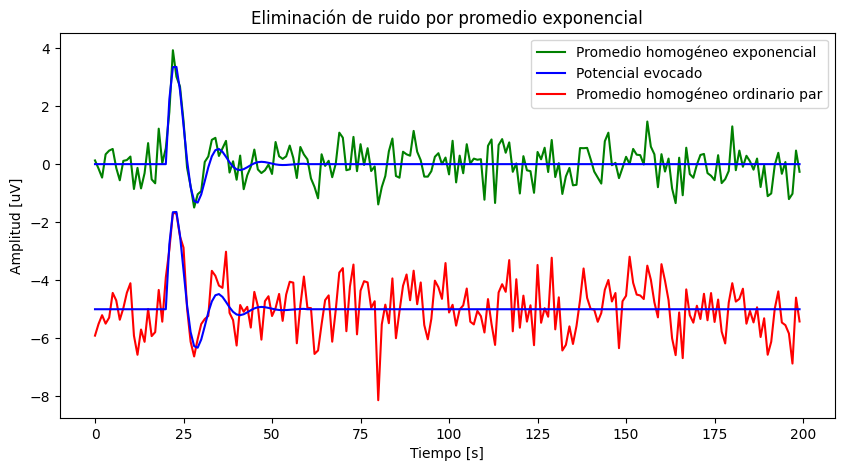

In [ ]:
N = x_realizaciones.shape[0]

s_0 = x_realizaciones[0,:] #Primer realizacion es el primer promedio

v_0 = np.zeros([1,N])

for i in range(1,N):
  s_0 = (i*s_0 + x_realizaciones[i,:])/(i+1) # Formula para actualizar el promedio
  v_0[0,i] = np.var(s_0)


plt.figure(figsize=(10,5))
plt.plot(s_0, 'g', label = 'Promedio homogéneo exponencial')
plt.plot(pe,'b', label = 'Potencial evocado')
plt.plot(s_par-5, 'r', label = 'Promedio homogéneo ordinario par')
plt.plot(pe-5,'b')
plt.title('Eliminación de ruido por promedio exponencial')
plt.ylabel('Amplitud [uV]')
plt.xlabel('Tiempo [s]')
plt.legend(loc='upper right')
plt.show()

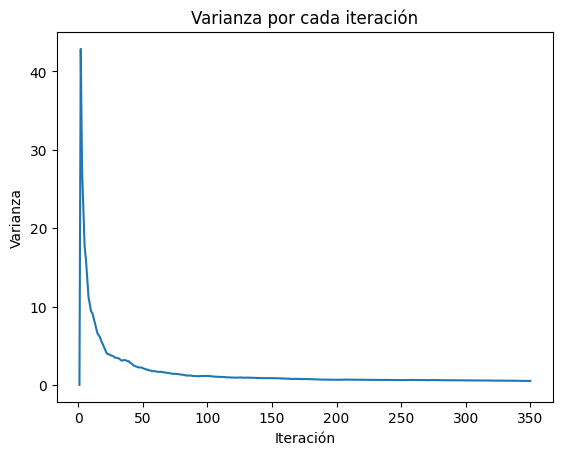

In [ ]:
m = np.linspace(1,N,N)
plt.plot(m,v_0[0])
plt.xlabel('Iteración')
plt.ylabel('Varianza')
plt.title('Varianza por cada iteración')
plt.show()